In [2]:
import pandas as pd
col_names = ['pregnant','glucose','bp','skin','insulin','bmi','pedigree','age','label']
pima = pd.read_csv("C:/Users/Kaushik/Documents/Kaggle Datasets/Classification Datasets/Diabetes/diabetes.csv", names = col_names)

In [3]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Can we predict diabetis status of a patient given their health measurements?

# Define X and y
feature_cols = ['pregnant','insulin','bmi','age']
X = pima[feature_cols]
y = pima.label

In [5]:
# Split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [6]:
# Train a Logistic Regression model on the training set
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [7]:
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)

In [8]:
                            # Classification Accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred_class))

0.6770833333333334


In [9]:
               # Null Accuracy : accuracy that could be achieved by always predicting the most frequent class
# Examine the class distribution of the testing set (using Panda series method)
y_test.value_counts()

0    130
1     62
Name: label, dtype: int64

In [10]:
# Calculate percentage of ones
y_test.mean()

0.3229166666666667

In [11]:
# Calculate percentage of zeros
1 - y_test.mean()

0.6770833333333333

In [12]:
# Calculate Null Accuracy
y_test.value_counts().head(1)/len(y_test)

0    0.677083
Name: label, dtype: float64

In [13]:
# Comparing the true and predicted responses
print('True',y_test.values[0:25])
print('Pred',y_pred_class[0:25])

True [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
Pred [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [14]:
#Confusion matrix: First arg is True values , Second is Predicted values
metrics.confusion_matrix(y_test,y_pred_class)

array([[114,  16],
       [ 46,  16]], dtype=int64)

In [15]:
# Save confusion matrix and slice it into four pieces
confusion = metrics.confusion_matrix(y_test,y_pred_class)
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [16]:
Classificaton_Accuracy = (TP+TN)/(TP+TN+FP+FN) # metrics.accuracy_score()
Classification_Error = 1-Classificaton_Accuracy
Sensitivity = TP/(TP+FN) # metrics.recall_score()
Specificity = TN/(TN+FP)
Precision = TP/(TP+FP) # metrics.precision_score()

In [17]:
Classificaton_Accuracy

0.6770833333333334

In [18]:
Sensitivity

0.25806451612903225

In [19]:
Specificity

0.8769230769230769

In [20]:
Precision

0.5

In [21]:
logreg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
# After deciding the algo based on sensitivity, We are interested in who ever has diabetes
y_pred_prob = logreg.predict_proba(X_test)[:,1]

In [27]:
# allow the plots to appear
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size']=14

Text(0, 0.5, 'Frequency')

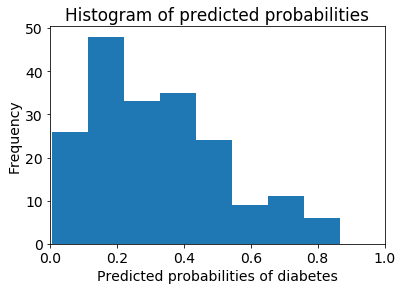

In [28]:
#histogram of predicted probabilities

plt.hist(y_pred_prob,bins = 8)
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probabilities of diabetes')
plt.ylabel('Frequency')

In [46]:
y_pred_prob = y_pred_prob.reshape(-1, 1)

In [53]:
y_pred_prob

array([0.38594133, 0.2494602 , 0.25832352, 0.39708673, 0.11573389,
       0.12304105, 0.49180008, 0.55417711, 0.22049231, 0.74146697,
       0.32293716, 0.82407106, 0.34811449, 0.18091391, 0.42276465,
       0.15215651, 0.44654688, 0.07349027, 0.46635231, 0.35046192,
       0.47202441, 0.39192458, 0.15370776, 0.44204822, 0.10103982,
       0.22638643, 0.05588069, 0.74269038, 0.10490497, 0.16748492,
       0.41374945, 0.34425078, 0.18250176, 0.37390015, 0.0845611 ,
       0.38783593, 0.44397396, 0.1092489 , 0.27514916, 0.28171778,
       0.24669244, 0.40272108, 0.22189867, 0.26339471, 0.66873945,
       0.00706526, 0.10628373, 0.17683771, 0.32535803, 0.24095393,
       0.282465  , 0.20914899, 0.7934619 , 0.37804475, 0.42967842,
       0.08943273, 0.14628981, 0.74255446, 0.14351044, 0.01930679,
       0.68458888, 0.46034603, 0.08118313, 0.25311321, 0.21150143,
       0.25836317, 0.46830552, 0.16282169, 0.41883989, 0.38983925,
       0.15798729, 0.218916  , 0.24359488, 0.64015047, 0.49117

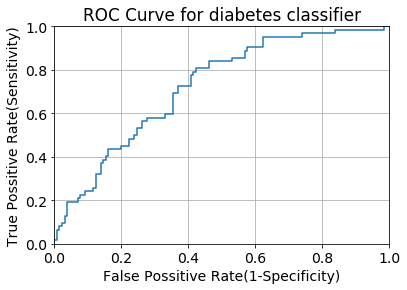

In [63]:
# Plotting ROC Curve

# Important: First val is True value, Second is predicted probabilities
fpr,tpr,thresholds = metrics.roc_curve(y_test,y_pred_prob)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC Curve for diabetes classifier')
plt.xlabel('False Possitive Rate(1-Specificity)')
plt.ylabel('True Possitive Rate(Sensitivity)')
plt.grid(True)

In [65]:
# Function that accepts threshold and prints sensitivity and specificity 
def evaluate_threshold(threshold):
    print('Sensitivity', tpr[thresholds> threshold][-1])
    print('Specificity', 1 - fpr[thresholds> threshold][-1])

In [66]:
evaluate_threshold(0.5) # Locating threshold will be just a trial and error process

Sensitivity 0.25806451612903225
Specificity 0.8769230769230769


In [67]:
evaluate_threshold(0.3) # in the graph the X axis is 1 - specificity

Sensitivity 0.7258064516129032
Specificity 0.6307692307692307


In [68]:
# AUC is the percentage of ROC that is underneath the curve 
metrics.roc_auc_score(y_test,y_pred_prob)

0.7227047146401985

In [71]:
# calculating cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(logreg,X,y,cv=10,scoring ='roc_auc').mean()

0.7425071225071225